## CNN-Project-OG
CIFAR-10 dataset, which is very famous dataset for image recognition! 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 


** Download the data for CIFAR from here: https://www.cs.toronto.edu/~kriz/cifar.html **

**Specifically the CIFAR-10 python version link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz **



In [1]:
# Put file path as a string here
CIFAR_DIR = 'cifar-10-batches-py/'

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle. 

** Load the Data. Use the Code Below to load the data: **

In [2]:
def unpickle(file):
    import pickle  ## for opening pickle data
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [4]:
all_data = [0,1,2,3,4,5,6]

In [5]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [6]:
batch_meta = all_data[0]
data_batch1 = all_data[1]  # datas are assigned to variables
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [7]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

** Why the 'b's in front of the string? **
Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 128 or greater must be expressed with escapes.

https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal

In [8]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.


** Grab a single image from data_batch1 and display it with plt.imshow(). You'll need to reshape and transpose the numpy array inside the X = data_batch[b'data'] dictionary entry.**

    # Array of all images reshaped and formatted for viewing
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
# Put the code here that transforms the X array!
X= data_batch1[b"data"]
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X.shape[0]

10000

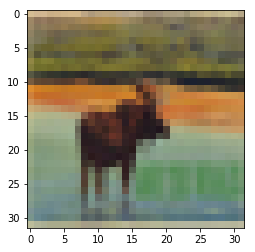

In [11]:
plt.imshow(X[66])

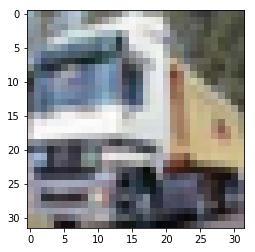

In [12]:
plt.imshow(X[1])

In [13]:
all_images = X.reshape(10000,3,32,32)
sample= all_images[0]
sample
## not proper shape so need reshaping below

array([[[ 59,  62,  63, ...,  93, 131, 103],
        [ 77, 125,  99, ..., 112,  75, 133],
        [105,  69, 136, ..., 148, 124, 103],
        ...,
        [ 54,  33,  86, ..., 133,  92,  55],
        [154, 122,  94, ...,  68,  80,  40],
        [ 13,  97,  53, ...,  92,  76, 175]],

       [[129, 106, 142, ..., 134,  93,  57],
        [145, 114,  89, ...,  55, 111,  60],
        [ 14, 146,  86, ..., 150, 113, 209],
        ...,
        [ 92, 153, 104, ..., 113,  67, 173],
        [150, 112, 202, ..., 136, 119,  50],
        [143, 104,  64, ..., 132, 171, 134]],

       [[ 99, 165, 115, ..., 101,  55, 136],
        [101,  60, 148, ..., 179, 162,  83],
        [141, 102,  65, ..., 107, 189, 151],
        ...,
        [177, 144, 116, ...,  82, 166, 132],
        [ 86, 163, 128, ..., 105,  69, 144],
        [ 95,  55, 112, ..., 123,  92,  72]]], dtype=uint8)

In [14]:
sample.transpose(1,2,0)## index positions above 

array([[[ 59, 129,  99],
        [ 62, 106, 165],
        [ 63, 142, 115],
        ...,
        [ 93, 134, 101],
        [131,  93,  55],
        [103,  57, 136]],

       [[ 77, 145, 101],
        [125, 114,  60],
        [ 99,  89, 148],
        ...,
        [112,  55, 179],
        [ 75, 111, 162],
        [133,  60,  83]],

       [[105,  14, 141],
        [ 69, 146, 102],
        [136,  86,  65],
        ...,
        [148, 150, 107],
        [124, 113, 189],
        [103, 209, 151]],

       ...,

       [[ 54,  92, 177],
        [ 33, 153, 144],
        [ 86, 104, 116],
        ...,
        [133, 113,  82],
        [ 92,  67, 166],
        [ 55, 173, 132]],

       [[154, 150,  86],
        [122, 112, 163],
        [ 94, 202, 128],
        ...,
        [ 68, 136, 105],
        [ 80, 119,  69],
        [ 40,  50, 144]],

       [[ 13, 143,  95],
        [ 97, 104,  55],
        [ 53,  64, 112],
        ...,
        [ 92, 132, 123],
        [ 76, 171,  92],
        [175, 134,  72]]

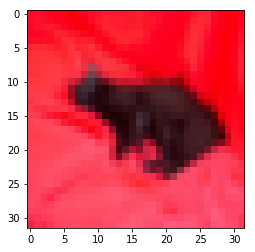

In [15]:
plt.imshow(X[21])

Create the Graph Session. 

In [16]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [17]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        # Grabs a list of all the data batches for training
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        self.test_batch = [test_batch]
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self): ## sets up images so sets through transposition
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [18]:

ch = CifarHelper()
ch.set_up_images()


Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [19]:
import tensorflow as tf

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

** Create 2 placeholders, x and y_true. Their shapes should be: **

* x shape = [None,32,32,3]
* y_true shape = [None,10]


In [20]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3]) ## 32 x32 pix
# 3 channels
y_true = tf.placeholder(tf.float32,shape=[None,10]) # dimensions

In [21]:
hold_prob = tf.placeholder(tf.float32)

you'll need: , those are called as helper functions

* init_weights
* init_bias
* conv2d
* max_pool_2by2
* convolutional_layer
* normal_full_layer

In [22]:
def init_weights(shape):
    init_random_dist=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

#init bias
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

#conv2d
def conv2d(x,W):
    # x -- >inputtenstor [batch,Height,Width,Channels]
    #W -- > kernel [filter Heights, filter Width,No of ChannelsIn, No of Channels
    #out]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

#pooling
def max_pool_2by2(x):
    # x-- > [batch,heigts,widths,channel]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
# stride is the window size for each tensor

## creating layers
## convolutional layer
def convolutional_layer(input_x,shape):
    W=init_weights(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

## normal layer( fully connected layer)
def normal_full_layer(input_layer,size):

    input_size=int(input_layer.get_shape()[1])
    W=init_weights([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,W) +b



Create a convolutional layer and a pooling layer
** Its up to you what the 2d size of the convolution should be, but the last two digits need to be 3 and 32 because of the 3 color channels and 32 pixels. So for example you could use:**



In [23]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

Instructions for updating:
Colocations handled automatically by placer.


Create the next convolutional and pooling layers.  The last two dimensions of the convo_2 layer should be 32,64 

In [24]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

** Now create a flattened layer by reshaping the pooling layer into [-1,8 \* 8 \* 64] or [-1,4096] -dont be scared its just shapes:)

In [25]:
8*8*64

4096

In [26]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,8*8*64])

In [27]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

Now create the dropout layer with tf.nn.dropout, remember to pass in your hold_prob placeholder.

In [ ]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Finally set the output to y_pred by passing in the dropout layer into the normal_full_layer function.

In [ ]:
y_pred = normal_full_layer(full_one_dropout,10)

Create a cross_entropy loss function **

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



adaptive learning rate optimizer(ADAM) very common in tf mostly u can use it without many questions

In [ ]:
optimizer  = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

Create a variable to intialize all the global tf variables.

In [ ]:
init = tf.global_variables_initializer()

Perform the training and test print outs in a Tf session and run your model! 
This will take ALOT OF TIME, and its gonna use all the processing power you have, (SORRY)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.101


Currently on step 100
Accuracy is:
0.4006


Currently on step 200
Accuracy is:
0.4665


Currently on step 300
Accuracy is:
0.4895


Currently on step 400
Accuracy is:
0.4924


Currently on step 500
Accuracy is:
0.5317


